In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
# Инициализация переменных для расчёта разрешения
img_L = 150
img_R = 2400

In [32]:
def light_gradation(light_arr, img_arr):
  temp_data = np.shape(img_arr)
  img_m = temp_data[0] * temp_data[1]

  light_arr = light_arr / img_arr.size

  tresh_hold = (np.max(light_arr) * 10) / 100
  temp_light_arr = light_arr > tresh_hold

  light_gradation_count = temp_light_arr.sum()

  if light_gradation_count > 7:
    print("Тоновое")
    print("R=L*m*2= ", img_L * img_m * 2)

  elif light_gradation_count <= 2 and light_gradation_count != 0:
    print("Штриховое")
    print("R=m*RV/2= ", img_m * (img_R / 2))

  else:
    print("Многоградационное")


In [34]:
def check_color(img):
  img_RGB = img.convert('RGB')
  weight, height = img_RGB.size

  for i in range(weight):
    for j in range(height):
      r, g, b = img_RGB.getpixel((i, j))

      if r != g != b:
          return False

  return True

In [35]:
def print_image(img, name):
    fig, axes = plt.subplots(1)

    axes.imshow(img, cmap="gray")
    axes.set_title(name)
    axes.axis("off")

    fig.set_figwidth(5)
    fig.set_figheight(5)

    plt.show()

In [36]:
def print_chart(img_arr, text):
    x = [i for i in range(0, 256)]
    y = np.zeros(256, dtype=int)
    y1 = np.zeros(256, dtype=int)
    y2 = np.zeros(256, dtype=int)
    y3 = np.zeros(256, dtype=int)
    plt.figure(figsize=[5, 3])

    if len(img_arr.shape) > 2:
      for i in img_arr[:, :, 0].flat:
        y[i] += 1
      for i in img_arr[:, :, 1].flat:
        y1[i] += 1
      for i in img_arr[:, :, 2].flat:
        y2[i] += 1
      for i in img_arr.flat:
        y3[i] += 1
      plt.bar(x, y)
      plt.bar(x, y1)
      plt.bar(x, y2)

    else:
      for i in img_arr.flat:
        y3[i] += 1
      plt.bar(x, y3)

    plt.title(text)
    plt.ylabel("Кол-во пикселей")
    plt.xlabel("Уровень яркости")
    plt.xlim([-1, 256])
    plt.show()

    light_gradation(y3, img_arr)


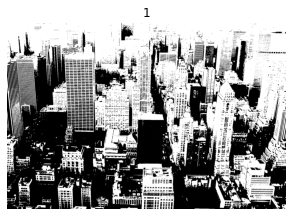

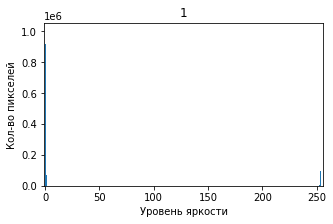

Штриховое
R=m*RV/2=  2511278400.0
Черно-белое


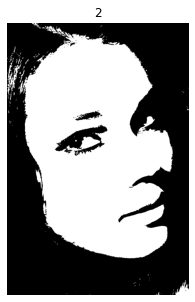

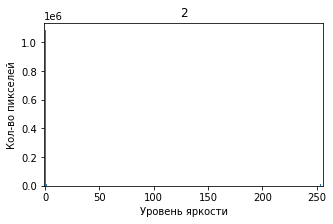

Штриховое
R=m*RV/2=  2511278400.0
Черно-белое


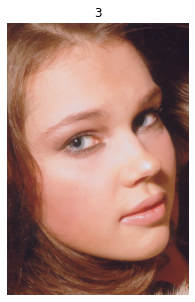

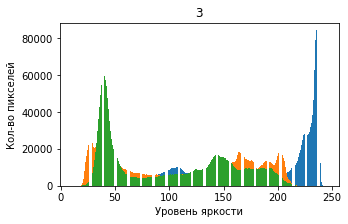

Тоновое
R=L*m*2=  627819600
Цветное


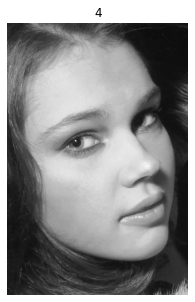

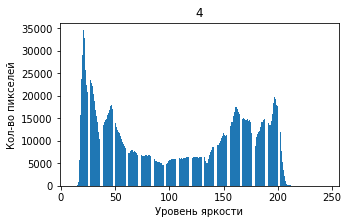

Тоновое
R=L*m*2=  627288000
Черно-белое


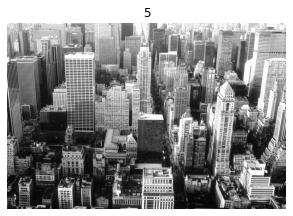

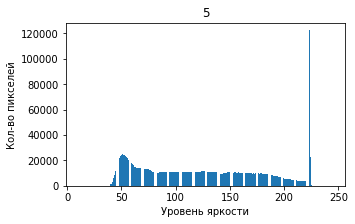

Тоновое
R=L*m*2=  627819600
Черно-белое


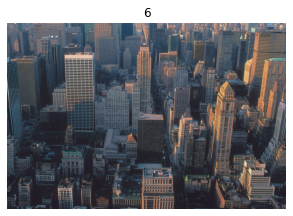

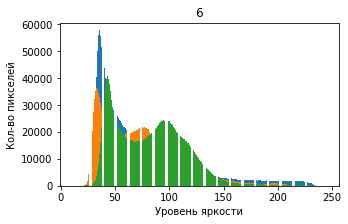

Тоновое
R=L*m*2=  627819600
Цветное


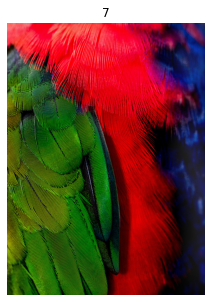

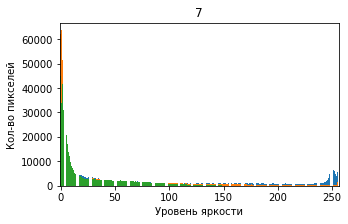

Тоновое
R=L*m*2=  144322200
Цветное


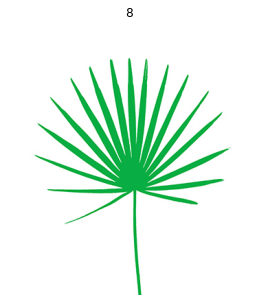

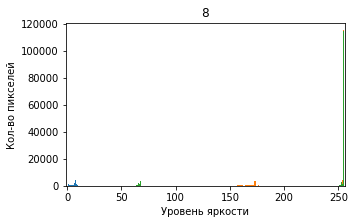

Штриховое
R=m*RV/2=  168220800.0
Цветное


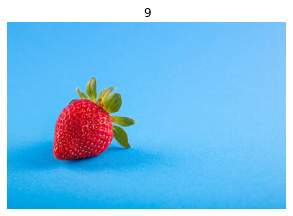

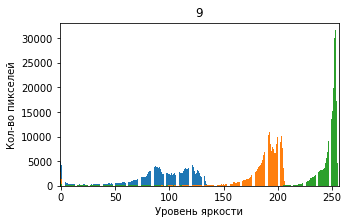

Тоновое
R=L*m*2=  70033500
Цветное


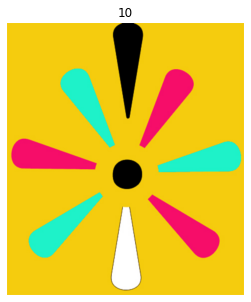

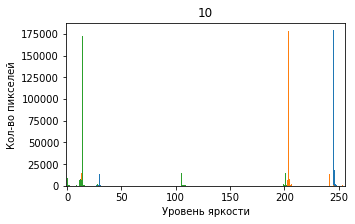

Многоградационное
Цветное


In [37]:
# Отображение информации о каждой картинке в директории
for count in range(1, 11):
  img = Image.open(f'images/{count}.jpg')
  img_arr = np.asarray(img)

  # Отображение картинки и гистограммы
  print_image(img, count)
  print_chart(img_arr, count)

  # Проверка изображения на цветность
  if check_color(img) == True:
    print("Черно-белое")
  else:
    print("Цветное")
